# EDA de los datasets limpios y elección de las variables para el modelo de recomendación

En esta Jupyter Notebook se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

### Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA del dataset `Users_reviews`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto user_reviews que ya pasó por el proceso de ETL.

#### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [2]:
df_reviews = pd.read_csv('../Data/df_reviews.csv')
df_reviews.head()

,user_id,item_id,recommend,posted_year,sentiment_score
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,2


Se revisan los tipos de datos y cantidad de nulos si hay.

In [3]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
info_df_reviews = pd.DataFrame({
    'Tipo de Dato': df_reviews.dtypes,
    'Valores Nulos': df_reviews.isnull().sum(),
    'Porcentaje de no Nulos' : df_reviews.notnull().mean()* 100,
    'Porcentaje de Nulos': df_reviews.isnull().mean() * 100
})
info_df_reviews

La cantidad de registros que hay son: 59305


,Tipo de Dato,Valores Nulos,Porcentaje de no Nulos,Porcentaje de Nulos
user_id,object,0,100.0,0.0
item_id,int64,0,100.0,0.0
recommend,bool,0,100.0,0.0
posted_year,int64,0,100.0,0.0
sentiment_score,int64,0,100.0,0.0


Se tienen 59305 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'posted_year' donde se rellenó con la moda.

#### Columnas 'sentiment_score' y 'recommend'

In [4]:
valan = [0,1,2]
punt = []
porc = []

for val in valan:
    # Filtrar las filas donde 'sentiment_score' es igual a 'val'
    filtrado = df_reviews['sentiment_score'] == val
    
    # Contar la cantidad de veces que aparece el valor
    cantidad = filtrado.sum()
    
    # Calcular el porcentaje de veces que aparece el valor
    porcentaje = (cantidad / len(df_reviews['sentiment_score'])) * 100
    
    # Agregar los resultados a las listas
    punt.append(cantidad)
    porc.append(porcentaje)

# Crear un DataFrame con los resultados
resultado = pd.DataFrame({'Cantidad': punt,
                          'Porcentaje': porc})
resultado


,Cantidad,Porcentaje
0,177,0.298457
1,1500,2.529298
2,57628,97.172245


In [5]:
reco = [True,False]
punt = []
porc = []

for val in reco:
    # Filtrar las filas donde 'sentiment_score' es igual a 'val'
    filtrado = df_reviews['recommend'] == val
    
    # Contar la cantidad de veces que aparece el valor
    cantidad = filtrado.sum()
    
    # Calcular el porcentaje de veces que aparece el valor
    porcentaje = (cantidad / len(df_reviews['recommend'])) * 100
    
    # Agregar los resultados a las listas
    punt.append(cantidad)
    porc.append(porcentaje)

# Crear un DataFrame con los resultados
resultado = pd.DataFrame({'': reco,
                        'Cantidad': punt,
                        'Porcentaje': porc})
resultado

,,Cantidad,Porcentaje
0,True,52473,88.479892
1,False,6832,11.520108


De los registros de reviews casi el 97% de los reviews reflejan sentimientos neutrales, 2% reflejan sentimientos positivos hacia el juego y menos del 1% fue negativo y en el 88% de los reviews se recomiendan los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [6]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_score', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_score recommend                      
0               False            92    0.155130
                True             85    0.143327
1               False           133    0.224264
                True           1367    2.305033
2               False          6607   11.140713
                True          51021   86.031532

Se puede ver que el porcentaje respecto del total de los reviews que el 2% de los reviews que reflejan un sentimiento neutral recomienda el juego por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo en un 0.15% aún recomienda el juego, lo que es algo contradictorio. Otra posible razonamientos seria que a la hora de normalizar el modelo detecto comentarios positivos donde no habían a pesar de la normalización y tratado que se le hizo a los comentarios.

#### Columna 'posted_year'

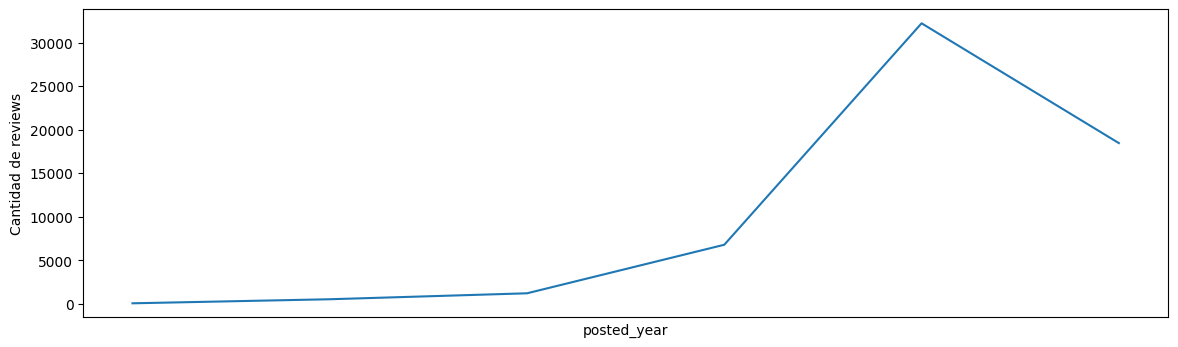

In [7]:
# Convierte a formato fecha
df_reviews["posted_year"] = pd.to_datetime(df_reviews["posted_year"])
# Calcula la cantidad de review por fecha
df_counts = df_reviews.groupby("posted_year").count()

# Gráfica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted_year", y="recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

### EDA del dataset `Steam_games`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto steam_games que ya pasó por el proceso de ETL.

#### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [8]:
df_games = pd.read_csv('../Data/df_games.csv')
df_games.head()

,title,id,developer,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,year
0,Lost Summoner Kitty,761140,Kotoshiro,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,2018
1,Ironbound,643980,Secret Level SRL,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2018
2,Real Pool 3D - Poolians,670290,Poolians.com,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,2017
3,弹炸人2222,767400,彼岸领域,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2017
4,Battle Royale Trainer,772540,Trickjump Games Ltd,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2018


Se revisan los tipos de datos y cantidad de nulos si hay.

In [9]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
info_df_games = pd.DataFrame({
    'Tipo de Dato': df_games.dtypes,
    'Valores Nulos': df_games.isnull().sum(),
    'Porcentaje de no Nulos' : df_games.notnull().mean()* 100,
    'Porcentaje de Nulos': df_games.isnull().mean() * 100
})
info_df_games

La cantidad de registros que hay son: 22530


,Tipo de Dato,Valores Nulos,Porcentaje de no Nulos,Porcentaje de Nulos
title,object,0,100.0,0.0
id,int64,0,100.0,0.0
developer,object,0,100.0,0.0
Action,int64,0,100.0,0.0
Adventure,int64,0,100.0,0.0
Animation &amp; Modeling,int64,0,100.0,0.0
Audio Production,int64,0,100.0,0.0
Casual,int64,0,100.0,0.0
Design &amp; Illustration,int64,0,100.0,0.0
Early Access,int64,0,100.0,0.0


Este conjunto de datos tiene 25 columnas y 22530 registros. Para recordar, contiene la información relacionada a cada juego como el  año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicador, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

#### Columnas 'id' y 'title'

Estas columnas hacen referencia al identificador único del juego y el título del juego. Este ultimo no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [10]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 22529


Hay un total de 22529 juegos

#### Columnas de géneros

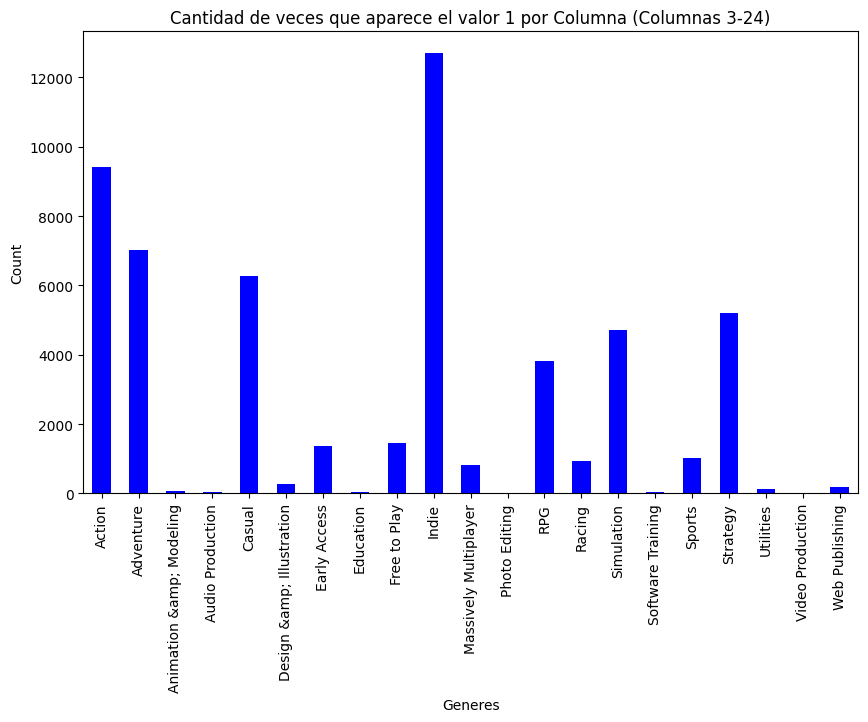

In [20]:
columnas_seleccionadas = df_games.iloc[:, 3:24]

# Obtener la cantidad de veces que aparece el valor 1 en cada columna
counts = columnas_seleccionadas.sum()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, color='blue')  # Puedes ajustar el color según tus preferencias
plt.title('Cantidad de veces que aparece el valor 1 por Columna (Columnas 3-24)')
plt.xlabel('Generes')
plt.ylabel('Count')
plt.show()

In [49]:
columnas_seleccionadas = df_games.iloc[:, 3:24]

# Obtener la cantidad de veces que el valor 1 aparece en cada columna
counts = columnas_seleccionadas.sum()

# Crear un DataFrame con la cantidad y el porcentaje
resultados = pd.DataFrame({'Cantidad': counts})
resultados

,Cantidad
Action,9430
Adventure,7021
Animation &amp; Modeling,83
Audio Production,30
Casual,6283
Design &amp; Illustration,264
Early Access,1360
Education,53
Free to Play,1458
Indie,12693


Los juegos están categorizados mayormente en las categorías Indi, Action, Adventure y Casual. Cabe recordar que un juego puede tener mas de un género asociado.

#### Columna 'year'

In [51]:
counts = df_games['year'].value_counts()
percentages = round(100 * counts / len(df_games),2)
# Crea un dataframe con el resumen
df_results = pd.DataFrame({
    "Cantidad": counts,
    "Porcentaje": percentages})
df_results

,Cantidad,Porcentaje
year,,
2017,7237,32.12
2016,5105,22.66
2015,3507,15.57
2014,1973,8.76
2013,1232,5.47
2012,1115,4.95
2011,512,2.27
2010,379,1.68
2009,300,1.33


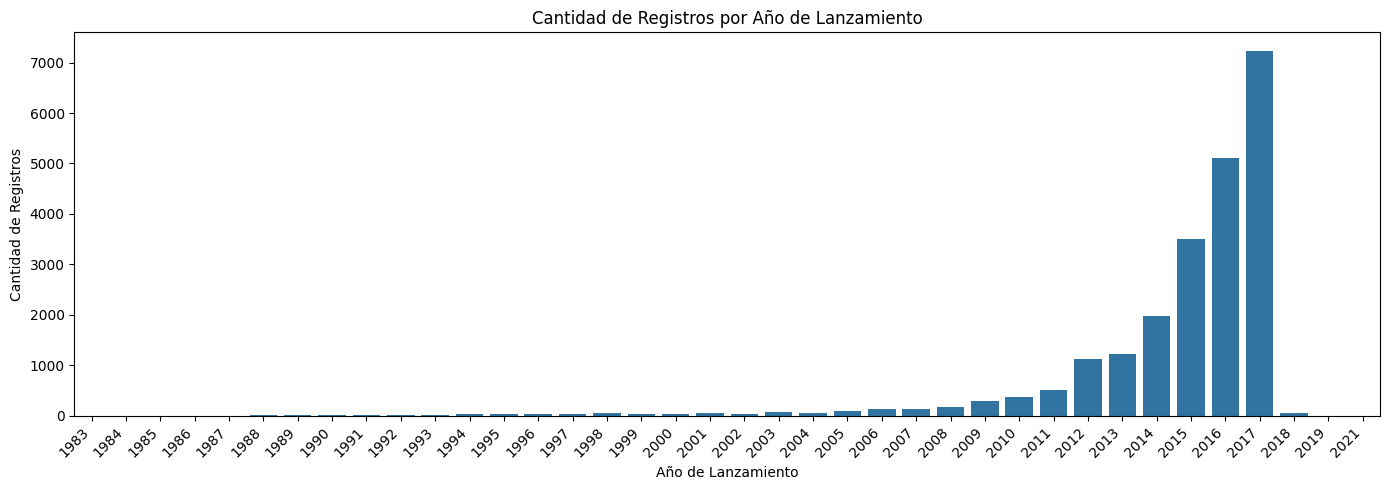

In [53]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['year'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
#conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
# Filtra los registros con valores no nulos y que son cadenas en la columna 'year'
registros_con_year_valido = df_games[df_games['year'].notnull() & df_games['year'].astype(str).str.isnumeric()]

# Convierte la columna 'year' a valores enteros
registros_con_year_valido['year'] = registros_con_year_valido['year'].astype(int)

# Filtra los registros con años de lanzamiento antes de 2002
registros_antes_2002 = registros_con_year_valido[registros_con_year_valido['year'] < 2002]
registros_despues_2018 = registros_con_year_valido[registros_con_year_valido['year'] < 2002]

print(f"Cantidad de registros antes de 2002: {len(registros_antes_2002)}")
print(f"Cantidad de registros después de 2018: {len(registros_despues_2018)}")


Cantidad de registros antes de 2002: 387
Cantidad de registros después de 2018: 387


Se pueden ver 387 juegos lanzados en años anteriores al 2002 lo que puede ser un error porque la plataforma se lanzó en el 2003.

#### Columna 'developer'

C:\Users\Gerard2\AppData\Local\Temp\ipykernel_9944\813115609.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


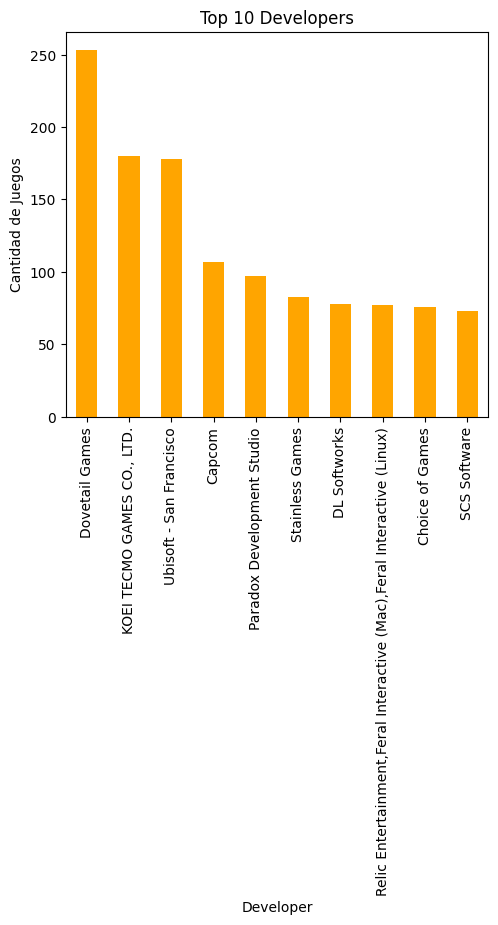

In [58]:
# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()
# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))
# Crear subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Dovetail, Koei y Ubisoft son los desarrolladores que mas juegos han desarrollado en la plataforma.

### EDA del dataset `Users_items`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto users_items que ya pasó por el proceso de ETL.

#### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [59]:
df_items = pd.read_csv('../Data/df_items.csv')
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-strike,6
1,76561197970982479,30,Day of defeat,7
2,76561197970982479,300,Day of defeat: source,4733
3,76561197970982479,240,Counter-strike: source,1853
4,76561197970982479,3830,Psychonauts,333


Se revisan los tipos de datos y cantidad de nulos si hay.



In [61]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
info_df_items = pd.DataFrame({
    'Tipo de Dato': df_items.dtypes,
    'Valores Nulos': df_items.isnull().sum(),
    'Porcentaje de no Nulos' : df_items.notnull().mean()* 100,
    'Porcentaje de Nulos': df_items.isnull().mean() * 100
})
info_df_items

La cantidad de registros que hay son: 3285246


,Tipo de Dato,Valores Nulos,Porcentaje de no Nulos,Porcentaje de Nulos
user_id,object,0,100.0,0.0
item_id,int64,0,100.0,0.0
item_name,object,0,100.0,0.0
playtime_forever,int64,0,100.0,0.0


Este conjunto de datos tiene 4 columnas y 3285246 registros. Para recordar, contiene la información relacionada con los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, así como los identificadores de los juegos que consumen y del propio usuario .

#### Columnas 'playtime_forever'

Estas columnas hacen referencia al tiempo en horas acumulados que un usuario ha jugado.

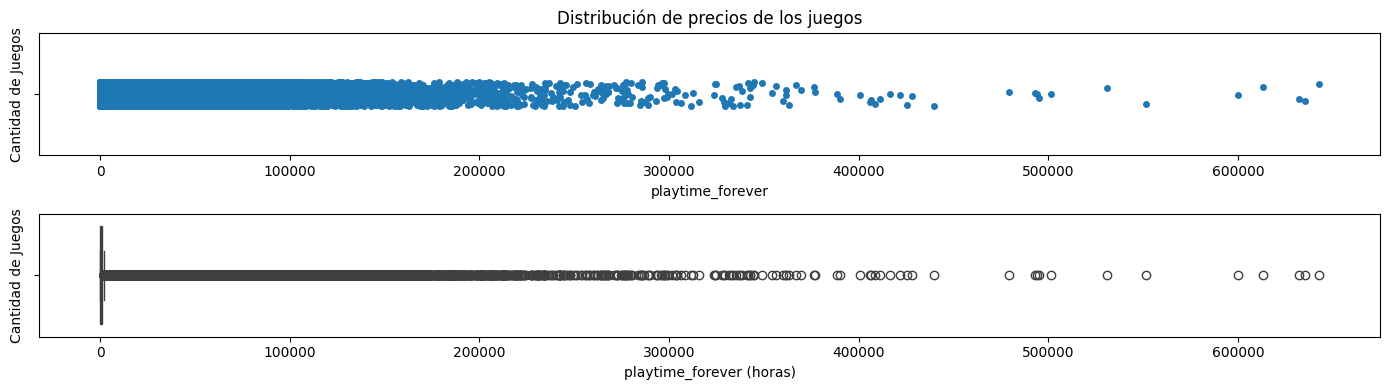

In [62]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_forever', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_forever', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

### Elección de las variables a usar en el modelo de recomendación

Para el modelo de recomendación se busca como resultado la recomendación un una lista de 5 juegos a partir de indicar el nombre de un juego o el id de un usuario, basado en un puntaje que se debe decidir cómo crearlo. Para ello, se revisan los dataframe df_reviews y df_items analizados anteriormente.

In [63]:
df_reviews = pd.read_csv('../Data/df_reviews.csv')
df_items = pd.read_csv('../Data/df_items.csv')

In [64]:
df_reviews.head(2)

,user_id,item_id,recommend,posted_year,sentiment_score
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2


In [65]:
df_items.head(2)

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-strike,6
1,76561197970982479,30,Day of defeat,7


Con los datos disponible, se decide crear un puntaje (rating) para los juegos a partir de considerar el análisis de sentimiento de las reviews para cada juego y las recomendaciones del usuario para ese juego. Recordar que el análisis de sentimiento esta calificado como 0 (sentimiento negativo), 1 (sentimiento neutral) y 2 (sentimiento positivo) y las recomendaciones al juego son True (cuando lo recomienda) y False (cuando no recomienda el juego). Con esta información se busca hacer un puntaje del 1 al 5, siendo el 1 un juego no recomendado que cuentan con reviews con sentimientos negativos y 5 un juego recomendado y con reviews positivos. Se considera esta escala en función de la combinación de las dos variables de esta manera:

* 1 si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
* 2 si el análisis de sentimiento es neutral y no es recomendado (False)
* 3 si el análisis de sentimiento es neutral pero es recomendado (True)
* 4 si el análisis de sentimiento es positivo y no es recomendado (False)
* 5 si el análisis de sentimiento es positivo y es recomendado (True)

Con esto, se arma la siguiente función:

In [70]:
def calcula_rating(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_score" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "recommend" (bool): Indica si las reseñas recomiendan.

    Devuelve:
        int o None: La calificación calculada como un número entero entre 1 y 5, o None si las entradas son inválidas.
    '''
    if row["sentiment_score"] == 0 and not row["recommend"]:
        return 1
    elif row["sentiment_score"] == 0 and row["recommend"]:
        return 1
    elif row["sentiment_score"] == 1 and not row["recommend"]:
        return 2
    elif row["sentiment_score"] == 1 and row["recommend"]:
        return 3
    elif row["sentiment_score"] == 2 and not row["recommend"]:
        return 4
    elif row["sentiment_score"] == 2 and row["recommend"]:
        return 5
    else:
        return None

In [71]:
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews.head(2)

,user_id,item_id,recommend,posted_year,sentiment_score,rating
0,76561197970982479,1250,True,2011,2,5
1,76561197970982479,22200,True,2011,2,5


Se crea un nuevo dataframe dejando solo las columnas 'user_id', 'item_id' y 'rating' y se reserva.

In [73]:
df1 = df_reviews[['user_id', 'item_id', 'rating']]
df1.head(2)

,user_id,item_id,rating
0,76561197970982479,1250,5
1,76561197970982479,22200,5


Se crea otro dataframe que contenga unicamente los 'item_id' y los nombres de los juego.

In [74]:
df2 = df_items[['item_id', 'item_name']]
# Se borran los duplicados
df2 = df2.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df2)} juegos')
df2.head(2)

Hay un total de 10050 juegos


,item_id,item_name
0,10,Counter-strike
1,30,Day of defeat


Luego se agregan los nombres de los juegos al primer dataframe.

In [77]:
df = df1.merge(df2, on="item_id", how='left')
df

,user_id,item_id,rating,item_name
0,76561197970982479,1250,5,Killing floor
1,76561197970982479,22200,5,Zeno clash
2,76561197970982479,43110,5,Metro 2033
3,js41637,251610,5,Barbie™ dreamhouse party™
4,js41637,227300,5,Euro truck simulator 2
...,...,...,...,...
59300,76561198312638244,70,5,Half-life
59301,76561198312638244,362890,5,Black mesa
59302,LydiaMorley,273110,5,Counter-strike nexon: zombies
59303,LydiaMorley,730,5,Counter-strike: global offensive


Se extraen muestras de 10 juegos a partir del dataframe para continuar con el tratamiento para el modelo de recomendación.

In [80]:
df.sample(10)

,user_id,item_id,rating,item_name
25459,nanakao,238460,5,Battleblock theater
54079,76561198079149720,252490,1,Rust
11195,Dozza_The_Wozza,550,5,Left 4 dead 2
21824,76561198090642401,292030,5,The witcher 3: wild hunt
52895,76561198072985865,440,5,NaN
54,Fr0stedLine,220,5,Half-life 2
43870,76561198028024146,570,5,NaN
30203,akaFG,730,5,Counter-strike: global offensive
27449,CookedTuna,38210,5,Roogoo
7214,reivehnfliyt,224260,5,No more room in hell


Se pueden observar algunos juegos a los cuales los usuarios les hicieron comentarios, pero que no están en el dataframe `df_items`. Se verifican los tipos de datos y la cantidad de nulos y luego se revisan las filas con nulos.

In [78]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
info_df = pd.DataFrame({
    'Tipo de Dato': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de no Nulos' : df.notnull().mean()* 100,
    'Porcentaje de Nulos': df.isnull().mean() * 100
})
info_df

La cantidad de registros que hay son: 59305


,Tipo de Dato,Valores Nulos,Porcentaje de no Nulos,Porcentaje de Nulos
user_id,object,0,100.000000,0.000000
item_id,int64,0,100.000000,0.000000
rating,int64,0,100.000000,0.000000
item_name,object,6528,88.992496,11.007504


In [90]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df[df.isnull().any(axis=1)]
# Se calculan la cantidad de juegos en esta situación
print(f"Hay un total de {len(sin_juegos['item_name'].unique())} juegos con reviews pero que no están en `df_reviews`")
sin_juegos

Hay un total de 1 juegos con reviews pero que no están en `df_reviews`


,user_id,item_id,rating,item_name
30,76561198089393905,440,5,NaN
32,76561198077246154,440,5,NaN
40,DJKamBer,570,5,NaN
44,DJKamBer,440,5,NaN
46,Rainbow-Dashie,440,5,NaN
...,...,...,...,...
59280,76561198272389051,440,5,NaN
59288,76561198289386531,440,5,NaN
59294,JustMielThings,570,5,NaN
59297,76561198310819422,570,5,NaN


Se decide borrarlos del conjunto de datos.



In [91]:
# Se borran los nulos
df = df.dropna(subset=['item_name'])
# Se cuentan los registros que quedan
print(f'Quedan {df.shape[0]} registros')

Quedan 52777 registros


In [92]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
info_df = pd.DataFrame({
    'Tipo de Dato': df.dtypes,
    'Valores Nulos': df.isnull().sum(),
    'Porcentaje de no Nulos' : df.notnull().mean()* 100,
    'Porcentaje de Nulos': df.isnull().mean() * 100
})
info_df

La cantidad de registros que hay son: 52777


,Tipo de Dato,Valores Nulos,Porcentaje de no Nulos,Porcentaje de Nulos
user_id,object,0,100.0,0.0
item_id,int64,0,100.0,0.0
rating,int64,0,100.0,0.0
item_name,object,0,100.0,0.0


Se crea un último dataframe con las columnas necesarias para los modelos de recomendación.

In [93]:
df = df[['user_id', 'item_name', 'rating']]
df.head(3)

,user_id,item_name,rating
0,76561197970982479,Killing floor,5
1,76561197970982479,Zeno clash,5
2,76561197970982479,Metro 2033,5


En el siguiente gráfico se pueden ver la cantidad de reviews distribuidos por el puntaje adoptado.



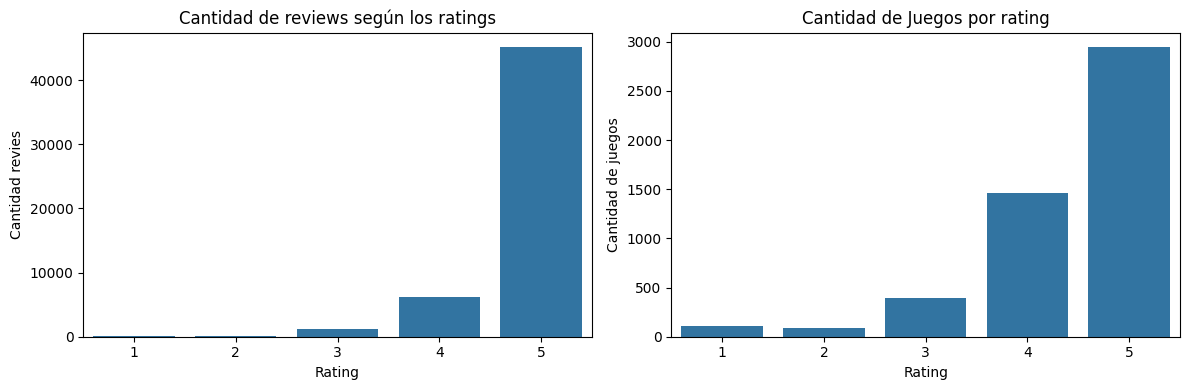

In [94]:
# Agrupa las calificaciones por rating
ratings_count = df['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df.groupby('rating')['item_name'].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x='rating', y='count', ax=axes[0])
axes[0].set_title('Cantidad de reviews según los ratings') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Cantidad revies')

# Segundo subplot
sns.barplot(data=unique_games_per_rating, x='rating', y='item_name', ax=axes[1])
axes[1].set_title('Cantidad de Juegos por rating') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Cantidad de juegos')

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [97]:
# Cantidades de juegos por rating
unique_games_per_rating

,rating,item_name
0,1,111
1,2,88
2,3,392
3,4,1458
4,5,2943


Se puede ver en la gráfica de la derecha que la mayoría de las reviews tienen un 'rating' de 5, correspondiente a sentimientos positivos y que recomiendan el juego,le siguen 'rating' 4, corresponde a sentimientos positivos y que no recomiendan los juegos comentados, seguido de 'rating' 3 que corresponde a sentimientos neutrales pero no recomendado. Finalmente, se observan menos comentarios con sentimiento negativo.

Finalmente, se guarda el dataframe a utilizar en el modelo de recomendación.

In [100]:
df.to_csv('../Data/df_recomendacion.csv', index=False, encoding='utf-8')
print(f"Se guardado como '../Data/df_recomendacion.csv'")

Se guardado como '../Data/df_recomendacion.csv'
